# Analyze vocations descriptively
*by Fletcher Passow*

June 2024 (updated April 2025)

## Import `kedro` environment

In [4]:
%reload_ext kedro.ipython

[08/12/25 18:11:57] INFO     Registered line magic '%reload_kedro'                                   ]8;id=525167;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=72242;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=134898;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=856239;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#60\60]8;;\

                    INFO     Resolved project path as:                                              ]8;id=270733;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=811721;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#171\171]8;;\
                             /Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot                
                             -strategies.                                                                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[08/12/25 18:11:58] INFO     Kedro project Electrified Depot Strategies                             ]8;id=847962;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=631622;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=181237;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=642235;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#142\142]8;;\
                             'pipelines'                                                                           

[08/12/25 18:12:01] INFO     Registered line magic 'run_viz'                                        ]8;id=964269;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=862506;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#148\148]8;;\

## Import modules

In [5]:
import pandas as pd
from e_depot_strategies.pipelines.simulate.depot_power import hrs_to_timestamp, create_session_framework
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter

In [6]:
sns.set_context("paper", font_scale=1.5)
sns.set_style("whitegrid")

## Load data

In [7]:
sched = catalog.load("fleetdna_vehicle_days")
sched

                    INFO     Loading data from fleetdna_vehicle_days (CSVDataset)...            ]8;id=711812;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=726916;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#508\508]8;;\

,voc_cat_fac,type_id,class_id,drive_id,weight_class_group,deploy_id,Unnamed: 0,pid,fuel_id,vid,...,veh_day_id,day_id,voc_id,voc_id_fac,distance_total_mi,start_hrs,end_hrs,hrs_offshift,hrs_break,hrs_active
0,1,5,7,0,heavy,25,0,17,1,236,...,0,260,10,7,172.913326,3.447222,23.384556,4.062667,5.899444,14.037889
1,1,5,7,0,heavy,25,1,17,1,236,...,1,262,10,7,22.292786,21.172944,0.166556,21.006389,0.189722,2.803889
2,1,5,7,0,heavy,25,2,17,1,236,...,2,263,10,7,87.400215,5.468611,23.877278,5.591333,5.514167,12.894500
3,1,5,7,0,heavy,25,3,17,1,236,...,3,264,10,7,148.897089,8.338056,4.371667,3.966389,2.664056,17.369556
4,1,5,7,0,heavy,25,4,17,1,236,...,4,265,10,7,40.318958,4.810333,23.728833,5.081500,10.747278,8.171222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,0,36,7,0,heavy,26,4699,17,1,239,...,4509,128,18,10,121.831355,8.556944,16.536833,16.020111,0.740611,7.239278
4439,0,36,7,0,heavy,26,4700,17,1,239,...,4510,129,18,10,124.780116,8.531611,17.634111,14.897500,1.348167,7.754333
4440,0,36,7,0,heavy,26,4702,17,1,239,...,4512,131,18,10,214.484149,8.750333,19.104000,13.646333,0.779556,9.574111
4441,0,36,7,0,heavy,26,4703,17,1,239,...,4513,132,18,10,136.145375,8.692722,17.257000,15.435722,0.886444,7.677833


In [8]:
fdna = catalog.load("fleet_dna_composite")
fdna

[08/12/25 18:12:05] INFO     Loading data from fleet_dna_composite (CSVDataset)...              ]8;id=388689;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=424554;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#508\508]8;;\

,vid,did,pid,class_id,voc_id,type_id,drive_id,fuel_id,day_id,trip_count,...,spd_cat_7_distance,spd_cat_7_mean_speed,spd_cat_7_std_speed,spd_cat_7_ttl,spd_cat_7_zero_speed,spd_cat_8_distance,spd_cat_8_mean_speed,spd_cat_8_std_speed,spd_cat_8_ttl,spd_cat_8_zero_speed
0,236,25,17,7,10,5,0,1,260,4,...,0.0,NaN,NaN,0,0,0.0,NaN,NaN,0,0
1,236,25,17,7,10,5,0,1,262,1,...,0.0,NaN,NaN,0,0,0.0,NaN,NaN,0,0
2,236,25,17,7,10,5,0,1,263,5,...,0.0,NaN,NaN,0,0,0.0,NaN,NaN,0,0
3,236,25,17,7,10,5,0,1,264,3,...,0.0,NaN,NaN,0,0,0.0,NaN,NaN,0,0
4,236,25,17,7,10,5,0,1,265,7,...,0.0,NaN,NaN,0,0,0.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,236,25,17,7,10,5,0,1,251,1,...,0.0,NaN,NaN,0,0,0.0,NaN,NaN,0,0
4701,236,25,17,7,10,5,0,1,252,2,...,0.0,NaN,NaN,0,0,0.0,NaN,NaN,0,0
4702,236,25,17,7,10,5,0,1,253,1,...,0.0,NaN,NaN,0,0,0.0,NaN,NaN,0,0
4703,236,25,17,7,10,5,0,1,258,1,...,0.0,NaN,NaN,0,0,0.0,NaN,NaN,0,0


In [9]:
vocs = catalog.load("fleet_dna_vocations")
vocs

[08/12/25 18:12:06] INFO     Loading data from fleet_dna_vocations (CSVDataset)...              ]8;id=370108;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=256316;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#508\508]8;;\

,voc_id,voc_name,voc_category
0,1,Telecom,Utility
1,2,Beverage Delivery,Delivery
2,3,Warehouse Delivery,Warehouse
3,4,Parcel Delivery,Delivery
4,5,School Bus,School Bus
5,6,Linen Delivery,Delivery
6,7,Refuse Pickup,Refuse
7,8,Long Haul,Long Haul
8,10,Mass Transit,Mass Transit
9,11,Towing,Towing


## Build availability graph

In [10]:
frame = create_session_framework(
    grp=sched["veh_day_id"],
    begin=sched["end_hrs"].transform(hrs_to_timestamp),
    end=sched["start_hrs"].transform(hrs_to_timestamp),
    freq="15T",
    is_time_cyclic=True,
)

In [11]:
voc_cat = sched[["veh_day_id", "voc_category"]]
avail = frame.reset_index()
avail = avail.rename(columns={"grp":"veh_day_id"})
avail = avail.merge(voc_cat, on="veh_day_id")
avail = avail.rename(columns={"voc_category":"Vocation"})
avail = avail.set_index(["Vocation", "veh_day_id", "time"])
avail = avail.sort_index()
avail

avail
Vocation  veh_day_id time                      
Delivery  146        1970-01-01 00:00:00      0
                     1970-01-01 00:15:00      0
                     1970-01-01 00:30:00      0
                     1970-01-01 00:45:00      0
                     1970-01-01 01:00:00      0
...                                         ...
Warehouse 1832       1970-01-01 22:45:00      0
                     1970-01-01 23:00:00      0
                     1970-01-01 23:15:00      0
                     1970-01-01 23:30:00      0
                     1970-01-01 23:45:00      1

[426528 rows x 1 columns]

[08/12/25 18:12:32] INFO     Saving data to availability (MatplotlibWriter)...                  ]8;id=397012;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=433237;file:///Users/fletcherpassow/Desktop/Stanford/PhD/papers/shared_depot/e-depot-strategies/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#550\550]8;;\

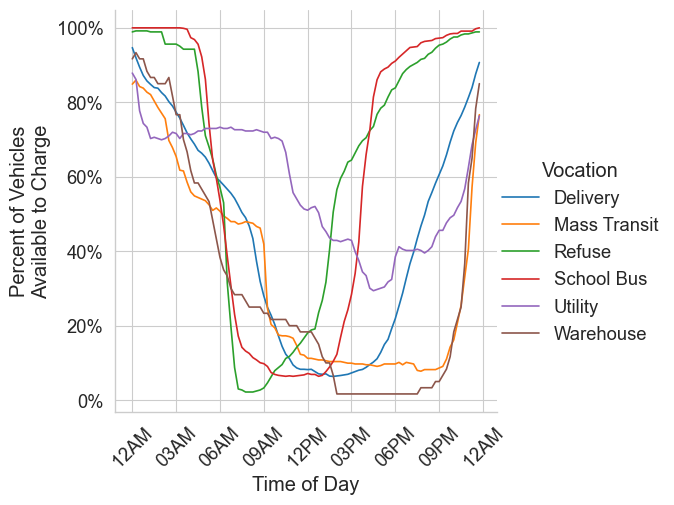

In [13]:
g = sns.relplot(
    data=avail,
    x="time",
    y="avail",
    hue="Vocation",
    kind="line",
    estimator="mean",
    errorbar=None
)
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%I%p"))
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_xlabel("Time of Day")
    ax.set_ylabel("Percent of Vehicles\nAvailable to Charge")
catalog.save("availability", g.figure)
g.figure

## Analyze vocation composition

In [14]:
fdna = fdna.merge(vocs, how="left", on="voc_id")
fdna

,vid,did,pid,class_id,voc_id,type_id,drive_id,fuel_id,day_id,trip_count,...,spd_cat_7_std_speed,spd_cat_7_ttl,spd_cat_7_zero_speed,spd_cat_8_distance,spd_cat_8_mean_speed,spd_cat_8_std_speed,spd_cat_8_ttl,spd_cat_8_zero_speed,voc_name,voc_category
0,236,25,17,7,10,5,0,1,260,4,...,NaN,0,0,0.0,NaN,NaN,0,0,Mass Transit,Mass Transit
1,236,25,17,7,10,5,0,1,262,1,...,NaN,0,0,0.0,NaN,NaN,0,0,Mass Transit,Mass Transit
2,236,25,17,7,10,5,0,1,263,5,...,NaN,0,0,0.0,NaN,NaN,0,0,Mass Transit,Mass Transit
3,236,25,17,7,10,5,0,1,264,3,...,NaN,0,0,0.0,NaN,NaN,0,0,Mass Transit,Mass Transit
4,236,25,17,7,10,5,0,1,265,7,...,NaN,0,0,0.0,NaN,NaN,0,0,Mass Transit,Mass Transit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,236,25,17,7,10,5,0,1,251,1,...,NaN,0,0,0.0,NaN,NaN,0,0,Mass Transit,Mass Transit
4701,236,25,17,7,10,5,0,1,252,2,...,NaN,0,0,0.0,NaN,NaN,0,0,Mass Transit,Mass Transit
4702,236,25,17,7,10,5,0,1,253,1,...,NaN,0,0,0.0,NaN,NaN,0,0,Mass Transit,Mass Transit
4703,236,25,17,7,10,5,0,1,258,1,...,NaN,0,0,0.0,NaN,NaN,0,0,Mass Transit,Mass Transit


In [15]:
fdna.value_counts(subset=["voc_category", "class_id"]).sort_index()


voc_category  class_id
Delivery      3           205
              4           262
              5           482
              6           382
              7           578
              8           708
Mass Transit  7           397
              8            75
Refuse        8           387
School Bus    6           857
Utility       2            29
              3           156
              8           127
Warehouse     7            60
Name: count, dtype: int64

In [16]:
voc_class_table = fdna.value_counts(subset=["voc_category", "voc_name", "class_id"]).sort_index()
voc_class_table = voc_class_table.reset_index()
voc_class_table = voc_class_table.rename(columns={
    "voc_category": "Vocation",
    "voc_name": "FleetDNA Vocation",
    "class_id": "FHWA Weight Class",
    "count": "Number of Vehicle Days"
})
voc_class_table

,Vocation,FleetDNA Vocation,FHWA Weight Class,Number of Vehicle Days
0,Delivery,Beverage Delivery,7,14
1,Delivery,Beverage Delivery,8,708
2,Delivery,Food Delivery,3,113
3,Delivery,Food Delivery,5,244
4,Delivery,Food Delivery,7,136
5,Delivery,Linen Delivery,5,107
6,Delivery,Linen Delivery,6,297
7,Delivery,Linen Delivery,7,19
8,Delivery,Local Delivery,7,292
9,Delivery,Parcel Delivery,3,92
